In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 과제 피드백(전체)

In [ ]:
#대부분이 작성한 코드.
x = np.array([np.random.normal(2,2) for i in range(10000)])
y = np.array(x*2)
print("y:", np.mean(y), "x:", np.mean(x))




def loss(b_1):
  return sum((y-b_1*x)**2)
#loss함수에서 이야기하는 y와 x는 무슨 변수인가? 

#y, x모두 전역변수인데 loss함수 내에서 지역변수처럼 써 버렸음. 이러면 다른 셀에서 x랑 y를 다루고자 할 때 컴퓨터가 헷갈림. 
#물론 전혀 오류는 아님. 하지만 이러한 함수 작성은 지양하자.



In [ ]:
#이상적인 방향 1

#global변수 활용하겠다는 선언
def loss(b_1):
  global x, y
  return sum((y-b_1*x)**2)

#이상적인 방향 2 (제일 이상적임)

def loss(b_1, x, y):  #아예 인자로 x, y를 전달. x와 y로 어떤 값이 들어와도 대응할 수 있음.
  return sum((y-b_1*x)**2)

아래는 시각화가 잘 되지 못한 예시이다. scatterplot 또는 어떤 방식으로든 점을 찍을 때에는 신중해야 한다. 동일 x point에 y가 여러 개 맵핑되는 경우는 점을 그리는 것이 적합하지 않다. 

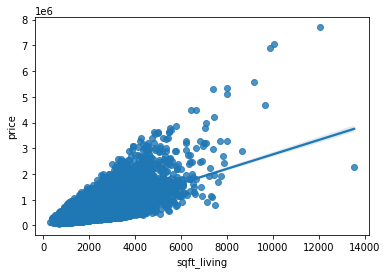

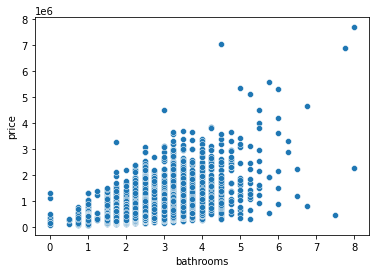

이런 식으로 한 x에 대한 y의 평균을 선으로 잇고, y의 표준편차를 음영으로 나타나게 하는 표현법이 좋아 보인다.

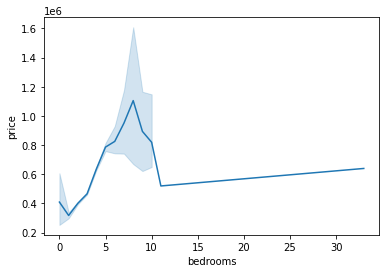

#3주차 Recap

분류 (Evaluation)



*   정확도(Accuracy)

*   오차행렬(Confusion Matrix)

*   정밀도(Precision)와 재현율(Recall)


*   F1 스코어





Logistic Regression

선형회귀를 분류에 적용하려면 무한대로 뻗어나가는 y의 범위를 0 부터 1로 수정해 주어야 한다. 이에 Sigmoid Function을 적용하면 음의 무한대부터 양의 무한대까지의 범위를 가지는 함수를 0~1로 맵핑해줄 수 있다. 

$$ Sigmoid function = \frac{1}{1+e^{-z}}$$

Support Vector Machine

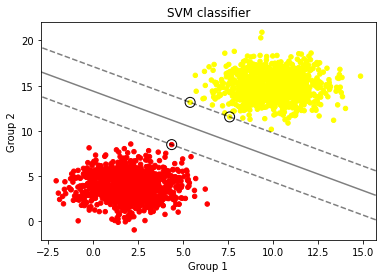

What is Ensemble?

RandomForest

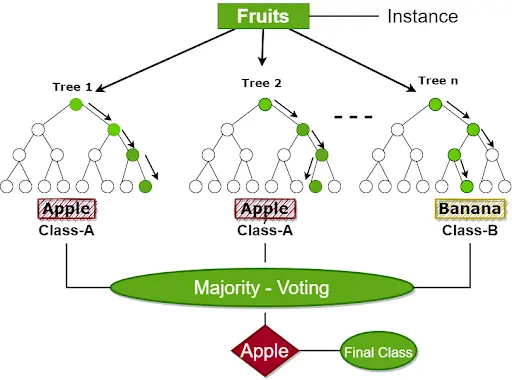

XGBoost

LightGBM

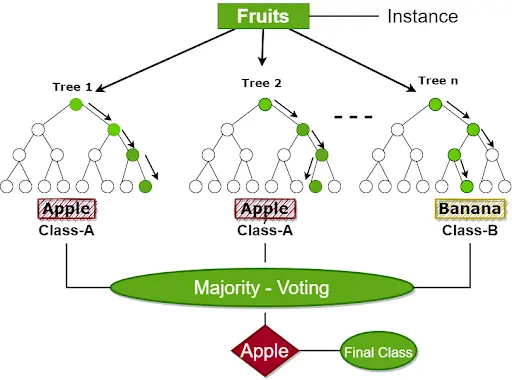

*   Logistic Regression


1.   결과를 직관적으로 이해할 수 있음
2.   기형적인 데이터셋에 적응하기 힘듬



---


*   Support Vector Machine


1.   비선형적인 데이터셋에도 적응할 수 있음.
2.   Overfitting에 강함(Robust)
3.   큰 데이터셋에 대해 연산 속도가 느림.


---


*   Random Forest

1. Overfitting에 강함(여러 모델을 평균하기에 한 모델이 두드러진 의견을 내도 묵살)
2. Ensemble 모델들 중에서 연산 속도가 느리고 복잡함

---


*   XGBoost

1. 이해하기 쉬움(학습 단계상 최종 단계 트리를 단일 차원에서 확인할 수 있으므로)
2. 불안정함(여러 모델이 직렬적으로 연결되어 있기 때문)

---


*   LightGBM

1. 연산 속도가 매우 빠름
2. Overfitting 가능성(트리 모델이 중심 트리 분할하기에 계속 깊어지기 때문)
3. Large Dataset에 적합(보통 10,000개 이상)
---




#HyperParameter Tuning

Hyperparameter Tuning: 인간이 사전 결정하는 값인 하이퍼파라미터를 조정해 보면서 어떤 하이퍼파라미터가 최고의 모델 성능을 내게 하는 지 분석하고 최적의 하이퍼파라미터 집합을 찾는 과정.

모든 모델이 전부 다른 종류의 하이퍼파라미터를 갖고 있다. 몇몇 모델별 예를 통해 알아보자.



*   다항회귀: 항의 개수

*   RandomForest: 나무의 개수, 최대 가지 깊이 등

*   SVM: C, Gamma, Kernel 


*   LightGBM: Learning rate, max_depth, lambda 등






In [2]:
#하이퍼파라미터 튜닝은 모델 최적화의 차원에서 너무 중요. 잘하면 튜닝만으로도 성능을 두 단계 세 단계 업그레이드 할 수 있기 때문.

#3주차 타이타닉 데이터로 연습해보자. 

In [3]:
#필요 라이브러리 임포트
#모델
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from xgboost import XGBClassifier #XGBoost
import lightgbm as lgb #LightGBM
from sklearn import tree


#기타
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [4]:
#3주차 EDA내용 불러오기. 그대로 복사붙여넣기한 것.
titanic = pd.read_csv("/content/gdrive/MyDrive/23w MLWIKI/titanic.csv") 
#타이타닉에 탔던 사람들의 신원 정보 데이터셋이다. Survived; 즉 다른 features를 보고 생존했는지 여부를 알아맞히는 문제이다. 
#Age는 평균으로 처리해 주자
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].mean())
#Cabin은 결측치가 거의 대부분인데 필요가 있을까? 이 피처는 쓰지 않는 것이 좋을 듯.
titanic = titanic.drop(["Cabin"], axis = 1 )
titanic["Embarked"] = titanic["Embarked"].fillna(titanic["Embarked"].value_counts().index[0]) #최빈값으로 fillna를 해 줌.
titanic['Family_Size'] = 0 #Family_size라는 열 생성 및 0으로 초기화.
titanic['Family_Size'] = titanic['Parch'] + titanic['SibSp'] #가족 수를 계산해주기.
titanic['Alone'] = 0 #Alone이라는 이진분류용 열 생성 및 0으로 초기화.
titanic.loc[titanic["Family_Size"] == 0,"Alone"] = 1 #Family_size 가 0인사람은 1로 라벨링. 나머지는 여전히 0
#Name, PassengerID, Ticket는 중요하지 않은 변수임. 생존분석에 어떠한 도움도 주지 않는다는 것을 직관적으로 이해할 수 있음.
titanic = titanic.drop(["Name", "PassengerId", "Ticket"], axis =1)
#Sex, Embarked 변수는 아직 categorical varable의 상태이므로 인코딩해주자. Label Encoding 활용하기.
from sklearn.preprocessing import LabelEncoder 

le_sex = LabelEncoder()
le_sex.fit(titanic["Sex"])
titanic["Sex"] = le_sex.transform(titanic["Sex"])
titanic.head() 
#Male은 1, Female은 0으로 인코딩됨.
le_embarked = LabelEncoder()
le_embarked.fit(titanic["Embarked"])
titanic["Embarked"] = le_embarked.transform(titanic["Embarked"])
titanic.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Alone
0,0,3,1,22.0,1,0,7.2500,2,1,0
1,1,1,0,38.0,1,0,71.2833,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,0,1
3,1,1,0,35.0,1,0,53.1000,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,0,1


In [5]:
X = titanic.drop(["Survived"], axis = 1)
y = titanic["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#712개의 데이터가 training에서 쓰이고 179개의 데이터가 test 과정에서 쓰임.

(712, 9) (179, 9) (712,) (179,)


In [6]:
#어떤 모델이든 그 성능을 여러 지표로 평가해 보여주는 함수를 제작하자.
def evaluate_metrics(model, X_test, y_test):
  y_hat = model.predict(X_test)
  print("Confusion matrix: ", confusion_matrix(y_test, y_hat), "\n")
  print("Accuracy: ", accuracy_score(y_test, y_hat), "\n")
  print("Precision: ", precision_score(y_test, y_hat), "Recall: ", recall_score(y_test, y_hat), "\n")
  print("F1 score: ", f1_score(y_test, y_hat), "\n")

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [7]:
#하이퍼 파라미터 튜닝을 SVM으로 해 보자. 
#조정하고 싶은 하이퍼파라미터는 kernel, C, gamma 세 개. 
#하이퍼파라미터 뭉치는 딕셔너리와 리스트를 결합해서 만듬.
#이들을 조합하는 경우의 수를 모두 연산해야 하니 조금 시간이 많이 걸림. 
#tqdm은 반복문에 감싸서 그 반복문의 연산 시간을 계산하는 메소드. 
from tqdm import tqdm
hparams = {"kernel" : ["linear", "poly", "rbf", "sigmoid"], "C" : [0.01, 0.1, 0.2, 0.5, 1.0]}
for kernel in tqdm(hparams['kernel']):
  for c in hparams["C"]:
    svc = svm.SVC(kernel = kernel, C = c) 
    svc.fit(X_train, y_train) 
    y_pred = svc.predict(X_test)
    print("kernel:", kernel, "C:", c,  "Score:", accuracy_score(y_test, y_pred))
#어떤 kernel과 C의 조합이 가장 적절한지 판단 가능. 
#아래의 결과를 바탕으로 보면 kernel: linear, C:0.01이 좋지 않을까 싶음.

  0%|          | 0/4 [00:00<?, ?it/s]

kernel: linear C: 0.01 Score: 0.7988826815642458
kernel: linear C: 0.1 Score: 0.7988826815642458
kernel: linear C: 0.2 Score: 0.7988826815642458
kernel: linear C: 0.5 Score: 0.7988826815642458


 50%|█████     | 2/4 [00:07<00:06,  3.09s/it]

kernel: linear C: 1.0 Score: 0.7988826815642458
kernel: poly C: 0.01 Score: 0.6145251396648045
kernel: poly C: 0.1 Score: 0.6201117318435754
kernel: poly C: 0.2 Score: 0.6201117318435754
kernel: poly C: 0.5 Score: 0.6256983240223464
kernel: poly C: 1.0 Score: 0.6312849162011173
kernel: rbf C: 0.01 Score: 0.5977653631284916


 75%|███████▌  | 3/4 [00:07<00:01,  1.75s/it]

kernel: rbf C: 0.1 Score: 0.6759776536312849
kernel: rbf C: 0.2 Score: 0.7039106145251397
kernel: rbf C: 0.5 Score: 0.7039106145251397
kernel: rbf C: 1.0 Score: 0.7094972067039106
kernel: sigmoid C: 0.01 Score: 0.5977653631284916
kernel: sigmoid C: 0.1 Score: 0.5977653631284916


100%|██████████| 4/4 [00:07<00:00,  1.95s/it]

kernel: sigmoid C: 0.2 Score: 0.6033519553072626
kernel: sigmoid C: 0.5 Score: 0.553072625698324
kernel: sigmoid C: 1.0 Score: 0.547486033519553


지난 시간에 배웠던 Cross Validation과 이러한 하이퍼파라미터 튜닝을 일일이 수작업하지 않고 한꺼번에 자동으로 해 줄 수 있는 그러한 모듈이 GridSearchCV이다. 

In [8]:
#GridSearchCV 사용 방법
#이 GridSearchCV는 완전자동화머신러닝(AutoML, PyCaret 등)이 아니라면 가장 빈번하고 또 유용하게 쓰게 될 복합 메소드이므로 그 활용법을 잘 알아두자. 
from sklearn.model_selection import GridSearchCV
svc = svm.SVC()
hparams = {"kernel" : ["linear", "poly", "rbf", "sigmoid"], "C" : [0.01, 0.1, 0.2, 0.5, 1.0]}

#estimator : 사용 모델. 이미 객체 형태로 선언되어 있어야 함
#param_grid: 하이퍼파라미터 집합. 리스트 형태를 딕셔너리로 싼 형태여야 함.
#scoring: 점수 매기는 기준. accuracy, f1, macro_f1 등 여러 개를 활용할 수 있음. 만일 평가자가(대회 기준) 평가 기준을 주었다면 그걸 활용하는 것이 합리적.
#cv: Cross Validation할 때의 k의 개수. 헷갈리면 KFoldCrossValidation 복습 필요.
#refit: 찾게 된 최고의 하이퍼파라미터 집합을 활용해서 estimator를 재 학습시킬 것인지의 여부. True or False의 불리언 변수로 웬만하면 True로 하자. 
#n_jobs: Parallel jobs의 수. 컴퓨터 연산성능 등에 관련된 지표로 딱히 중요치 않음.
#verbose: 학습 process를 사용자에게 전달할 것인지에 대한 변수. 0이면 어떠한 log도 없고 1이면 적당히 프린트해주고 2이면 많이 프린트해주고 이런 느낌..
gscv_svc = GridSearchCV(estimator = svc, param_grid = hparams, scoring ='accuracy', cv = 3, refit = True, n_jobs = 1, verbose = 2)
gscv_svc.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ................................C=0.01, kernel=poly; total time=   0.0s
[CV] END ................................C=0.01, kernel=poly; total time=   0.0s
[CV] END ................................C=0.01, kernel=poly; total time=   0.0s
[CV] END .................................C=0.01, kernel=rbf; total time=   0.0s
[CV] END .................................C=0.01, kernel=rbf; total time=   0.0s
[CV] END .................................C=0.01, kernel=rbf; total time=   0.0s
[CV] END .............................C=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .............................C=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .............................C=0.01, ke

GridSearchCV(cv=3, estimator=SVC(), n_jobs=1,
             param_grid={'C': [0.01, 0.1, 0.2, 0.5, 1.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [9]:
print('SVC 파라미터: ', gscv_svc.best_params_)
print('SVC 예측 정확도: {:.4f}'.format(gscv_svc.best_score_))

SVC 파라미터:  {'C': 0.5, 'kernel': 'linear'}
SVC 예측 정확도: 0.7809


In [10]:
#똑같은 걸 lightgbm에도 적용시켜보자.
param_lgb = {"learning_rate" : [0.01,0.1,0.2,0.3,0.4,0.5],
             "max_depth" : [25, 50, 75],
             "num_leaves" : [100,300,500,900,1200],
             "n_estimators" : [100, 200, 300,500,800,1000],
        
              }
#learning rate : 학습률 
#max_depth : 나무의 최대 층의 개수
#num_leaves : 최대 이파리의 개수. 즉 최종 층에서 나뉘게 되는 잎의 개수
#n_estimators : 나무의 개수

LGB = lgb.LGBMClassifier()
gscv_lgb = GridSearchCV(estimator = LGB, param_grid = param_lgb, scoring ='accuracy', cv = 3, refit = True, n_jobs = 1, verbose = 1)
gscv_lgb.fit(X_train, y_train)


Fitting 3 folds for each of 540 candidates, totalling 1620 fits


GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': [25, 50, 75],
                         'n_estimators': [100, 200, 300, 500, 800, 1000],
                         'num_leaves': [100, 300, 500, 900, 1200]},
             scoring='accuracy', verbose=1)

In [11]:
print('LGB 파라미터: ', gscv_lgb.best_params_)
print('LGB 예측 정확도: {:.4f}'.format(gscv_lgb.best_score_))

LGB 파라미터:  {'learning_rate': 0.01, 'max_depth': 25, 'n_estimators': 500, 'num_leaves': 100}
LGB 예측 정확도: 0.8174


#비지도학습

1~3주차에서는 분류나 회귀 등 정답 레이블이 주어진 지도학습에 대해 배웠다. 4주차에서는 정답 레이블이 없는 상태에서 학습하는 비지도학습에 대해 배운다. 

비지도학습(Unsupervised Learning)에는 주성분 분석(PCA), 군집화(Clustering), 이상치 탐지(Anomaly detection) 등이 있고 관점에 따라 강화 학습을 비지도학습의 카테고리에 넣을 수도 있다. ANN, 즉 인공 신경망의 차원에서는 챗봇이나 음성 합성 등에도 널리 이용되고 있다. 

#PCA

기계학습에서의 차원은 보통 열 공간(Column space)의 차원. 즉 열(Column, Feature)의 개수를 의미한다. 데이터는 차원이 높아질수록(Feature가 많아질수록) 그 처리에 여러 애로사항을 갖는다. 대표적인 문제점으로는 다음과 같은 것들이 있다.



1.   데이터 포인트 간 거리가 멀어진다(Sparsity). 희소한 데이터 분포는 모델의 학습을 저하한다.

2.   연산 속도가 느리다. 행렬 연산의 반복인 모델 학습 과정은 대상 행렬의 차원이 높을수록 연산 속도가 기하급수적으로 늘어난다.
3. 모델의 신뢰도가 떨어진다. 예를 들어, 선형회귀에서 각 계수들을 추정할 때 95%의 신뢰구간에서 추정하게 될텐데, 그 계수들의 개수가 엄청 많다면 (0.95)^n의 신뢰도가 될 것이며 그 모델의 예측 가능성이 급격히 저하된다.
4. 컬럼 간 상관관계가 높은 경우가 거의 필연적으로 생기게 되고 이는 다중공선성(MultiCollinearity)으로 이어지게 된다. 


따라서 전처리 과정에서 단순히 특정 열을 drop하는 메소드 외에도 PCA, LDA, SVD, Embedding 등의 방법론을 통해 데이터의 차원을 축소한다. 이러한 차원 축소(Dimension Reduction) 방법론 중 대표격인 PCA를 공부해 보자.

PCA(Principal Component Analysis): 차원 축소(Dimension Reduction)의 대표적인 기법으로 변수 간 상관관계와 분산을 분석하여 차원을 축소한다.

PCA 적용 사례: 국어와 영어 성적 간 상관관계가 매우 높고 수학과 과학 성적 간 상관관계가 매우 높다고 해 보자. 국어, 영어, 수학, 과학 성적을 바탕으로 이 학생의 종합 학업 성취도를 평가하고자 하는 상황이다.

In [12]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [13]:
#평균이 60점이고 표준편차가 5인 국어 성적 100개 임의로 생성
korean_array = np.array([np.random.normal(60, 5) for i in range(1000)]) 
#영어 성적은 국어 성적과 비슷하다는 가정에 맞게 살짝의 random noise만 더해준 상태. 
english_array = korean_array + np.array([np.random.normal(0, 0.5) for i in range(1000)]) 
#수학과 과학도 그런 식으로 만들어주자.
math_array = np.array([np.random.normal(70, 10) for i in range(1000)]) 
sci_array = math_array + np.array([np.random.normal(0, 0.5) for i in range(1000)]) 
#이후 이 4개의 array로 데이터프레임 만들어서 확인해 보기.
fullscore = pd.DataFrame([korean_array, english_array, math_array, sci_array]).T
fullscore.columns = ["korean", "english", "math", "science"]
fullscore.head()

,korean,english,math,science
0,54.629015,54.946741,56.300524,56.295781
1,44.647280,44.942127,84.041272,84.081713
2,66.586660,66.805270,77.559527,77.013184
3,66.598089,66.467332,85.817792,85.313964
4,54.876815,54.604046,74.420786,73.813478


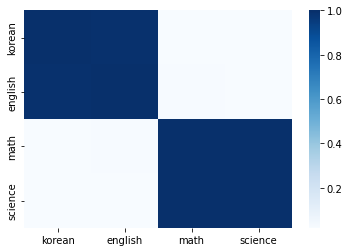

In [14]:
sns.heatmap(fullscore.corr(), cmap = "Blues") #korean과 english는 관계가 매우 큰고 math와 science가 관계가 매우 큰 것을 확인 가능.
#모든 데이터 피처는 독립성이 짙을수록 좋은데 이런 식으로 같이 움직이는 게(공선상에 있는 것들이) 많다면 곤란해짐.

이런 상황에서 korean, english를 묶어서 *언어*, math science를 묶어서 *수리과학* 따위의 컬럼으로 새로이 제작하면 어떨까? 하는 게 차원 축소.

PCA 적용 단계

1. 데이터셋이 너무 차원이 큰 지 확인한다.
2. Scaling을 적용한다.
3. components의 개수를 바꿔가며 PCA를 해 본다.

In [15]:
from sklearn.preprocessing import StandardScaler #데이터 스케일링
from sklearn.decomposition import PCA #PCA 패키지
Scaler = StandardScaler()
score_scaled = Scaler.fit_transform(fullscore)
score_scaled

array([[-1.0722235 , -1.00672851, -1.46144369, -1.45622066],
       [-3.11444267, -3.04838883,  1.44099604,  1.43902864],
       [ 1.37425827,  1.41326347,  0.7628285 ,  0.70249934],
       ...,
       [ 1.15003121,  1.24364865,  0.69765569,  0.71528923],
       [ 1.33422739,  1.23120388, -1.41842831, -1.41547566],
       [ 0.28128788,  0.27323883,  0.12408234,  0.0902206 ]])

In [16]:
pca = PCA(n_components = 2) #주성분의 개수. 즉 "언어, 수리과학"을 의미한다.
pca.fit(score_scaled) 
score_pca = pca.transform(score_scaled) 
print(score_pca.shape) #데이터의 개수는 똑같으면서 components. 즉 주성분의 개수만 2개가 됨.
#성공적으로 차원을 낮출 수 있었음.

(1000, 2)


In [17]:
pca.explained_variance_ratio_ #이 분산비에 대한 해석은 다음과 같이 할 수 있다. 
#첫 번째 component로 전체 데이터의 분산을 52%설명할 수 있고, 두 번째 component로 전체 데이터 분산을 47% 설명할 수 있다는 것. 
#즉 단 두 개의 component로 원본 데이터의 100%를 설명할 수 있다는 이야기.



array([0.51056884, 0.48777419])

위 예시에서는 임의로 거의 국어-영어/수학-과학이 상관관계가 1에 수렴하는 데이터들로 마련했기에 pca를 통한 차원 축소 후에도 유실되는 정보가 없었으나 대부분의 상황에서는 어떤 정보든 유실할 수밖에 없다. 단지 그 유실률을 낮추는 방향으로 모델링해야 하는 것!

In [18]:
#components의 개수 역시 하이퍼파라미터이고 우리가 판단해서 정해야 함.
#scree plot, 기여율, 고윳값, 모델 성능 등 다양한 기준으로 판단할 수 있지만 그 중 누적 기여율 차원에서 알아보자.

for i in range(1, 4): 
  score_scaled = Scaler.fit_transform(fullscore)
  pca = PCA(n_components = i) 
  pca.fit(score_scaled)
  score_pca = pca.transform(score_scaled)
  print(i, "개의 components로 분석한 분산비 : ", pca.explained_variance_ratio_)


#n_components는 몇 개로 설정하는 게 가장 좋을까? 1, 2, 3 중 생각해보기.

1 개의 components로 분석한 분산비 :  [0.51056884]
2 개의 components로 분석한 분산비 :  [0.51056884 0.48777419]
3 개의 components로 분석한 분산비 :  [0.51056884 0.48777419 0.0012953 ]


#군집화

군집화(또는 군집분석, Clustering)는 데이터 포인트들 중 유사한 것들끼리 묶어 의미를 창출하는 비지도학습의 일종이다.

군집화의 적용 사례에는 다음과 같은 것들이 있다.



---

단순: Feature Engineering, Social Network Analysis(사회 관계망 분석)

---

마케팅: 장바구니 분석(Association Rule Learning, AR), Market Segmentation

---

CV: Image Segmentation

---

추천 시스템(Recommendation System): 협업 필터링

---

NLP: Text segmentation

Social Network Analysis

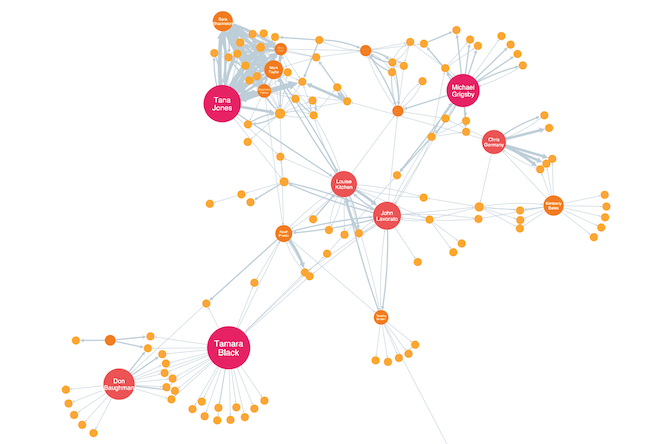

AR

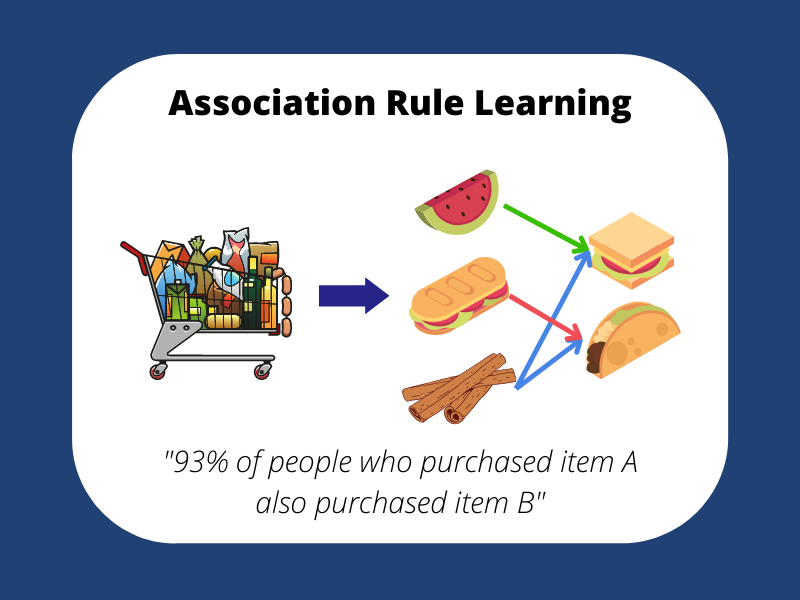

Image Segmentation

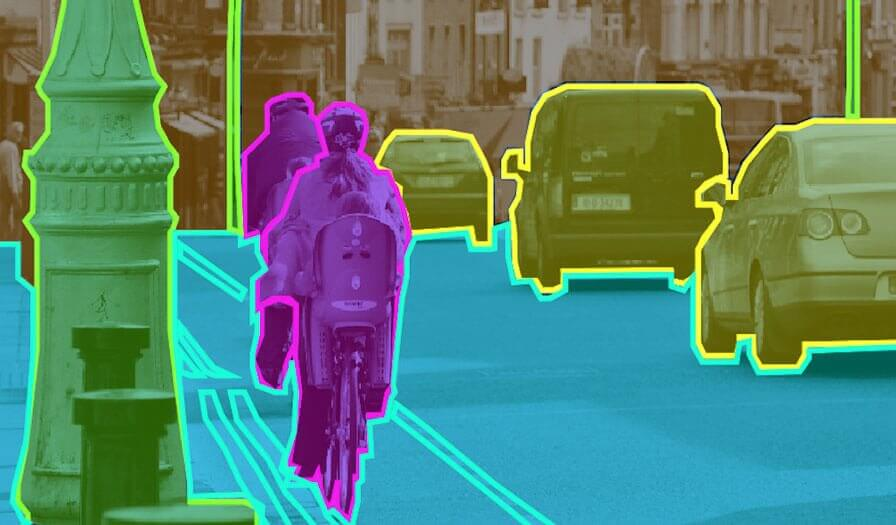

Collaborative Filtering

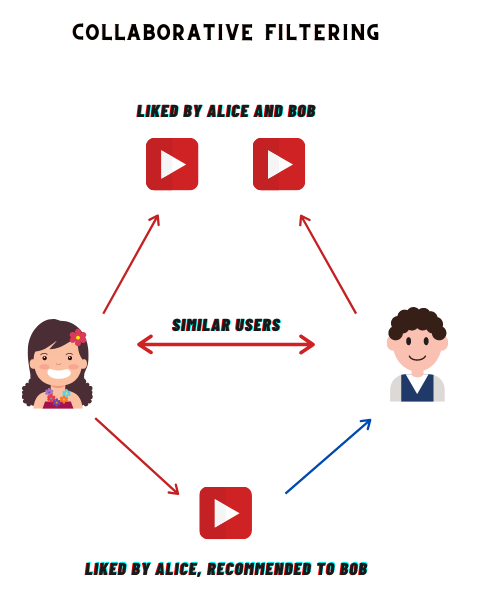

위 예시들에서와 같이 군집화는 Segmentation, 즉 무언가 구분하는 분야에서 많이 쓰인다. 지도학습에 비해 비지도학습(그 중에서도 군집화)이 가지고 있는 가장 결정적인 장점은 바로 Data labelling. **즉 데이터 수집 시 정답 레이블을 부여하는 행위를 할 필요가 없어 데이터 수집이 매우 용이하다는 점이다.**

##K-Means

K-means Clustering: 데이터 포인트 내에 K개의 클러스터 중심점을 찍어서 그 중심점에 가장 가까운 포인트들을 선택하는 군집화 기법

K-means Clustering 알고리즘 동작 원리

1. hyper-parameter인 K값을 설정한다.
2. K개의 center(중심점)을 선택한다. (보통 랜덤)
3. 각각의 데이터 포인트에 대해 가장 가까운 center를 찾고, 이 그룹에 포함시킨다.
4. 해당 그룹들의 평균값을 다시 center로 지정한다.
5. 위의 과정을 K개의 중심점들이 변화가 없을 때 까지 반복한다.

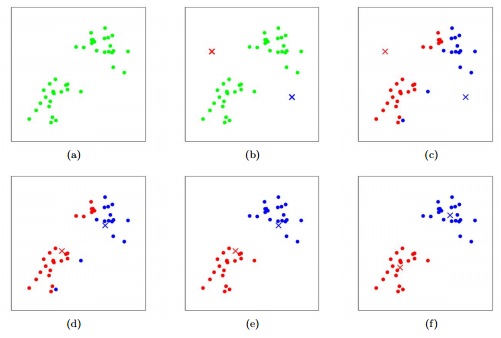

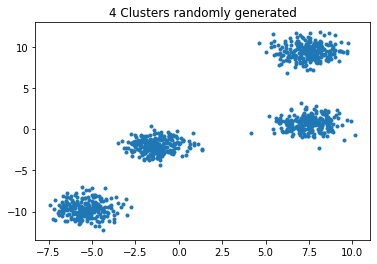

In [19]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
np.random.seed(8)
X, y = make_blobs(n_samples = 1000, centers = 4, cluster_std = 0.9)
plt.scatter(X[:, 0], X[:, 1], marker = ".")
plt.title("4 Clusters randomly generated")
plt.show()

In [20]:
#https://parkeunsang.github.io/blog/datascience/2021/03/10/pythonk-means.html에 원본 코드가 있습니다.
def distance(a, b):
    return sum((a - b) ** 2)/len(a)

def group_center(g):
    g = np.array(g)
    return g.mean(axis=0)

def cluster(x, k, seed=2022, iter_num=25):
    logs = []
    np.random.seed(seed)
    centers = x[np.random.choice(len(x), size=k, replace=False)]
    for it in range(iter_num):
        group = {}
        for i in range(k):
            group[i] = []
        # find nearest center
        for row in x:
            temp = []
            for i in range(k):
                temp.append(distance(centers[i], row))
            group[np.argmin(temp)].append(row.tolist())

        # plot data store
        for i in range(k):
            group_temp = np.array(group[i])
            group_temp = np.c_[group_temp, np.full(len(group_temp), i)]
            if i == 0:
                grouped = group_temp
            else:
                grouped = np.append(grouped, group_temp, axis = 0)

        # update center
        centers_new = []
        for i in range(k):
            centers_new.append(group_center(group[i]).tolist())
        centers_new = np.array(centers_new)
        # if updated center == center, break

        if np.sum(centers - centers_new) == 0:
            break
        else:
            centers = centers_new
            logs.append(grouped)
    return grouped, logs, it  

grouped, logs, it = cluster(X, 4)
print(f'iter num:{it}')

iter num:1


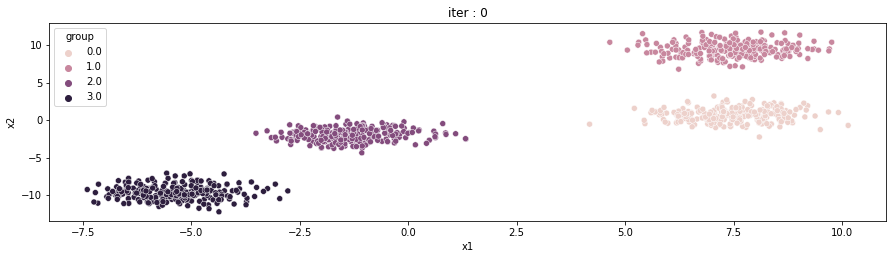

In [21]:
import seaborn as sns
plt.figure(figsize=(15,8))
for i in range(it):
    plt.subplot(2, it//2+1, i+1)  # row, col, index
    df = pd.DataFrame(logs[i])
    df.columns = ['x1', 'x2', 'group']
    sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = 'group').set_title(f'iter : {i}')

In [22]:
#라이브러리 활용해 보기 
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
iris = load_iris() #iris 데이터 불러오기
irisDF = pd.DataFrame(data = iris.data, columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"])
irisDF.head(3) #붓꽃 데이터의 정보를 4가지 feature로 정리한 데이터셋인데, 정답 레이블이 없음을 확인할 수 있음
#우리의 목적은 이 irisDF내에 있는 수많은 데이터포인트(붓꽃)들을 비슷한 것들끼리 묶어보고자 하는 것이다. 총 3개의 종류가 있다는 것을 알고 있음.


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [23]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, random_state = 0) 
kmeans.fit(irisDF)
#init은 초기 cluster point를 어떻게 설정할 것이냐에 대한 것인데 k-means++는 기존 kmeans에서 제공하는 경험적 포인트 위치, 'random'으로 쓰면 말그대로 랜덤 포인트로 설정함.
#max_iter 는 최대 반복횟수를 의미. 즉 얼마나 많이 클러스터 중점을 옮길 것이냐에 대한 것.

KMeans(n_clusters=3, random_state=0)

In [24]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [25]:

irisDF["target"] = iris.target #실제 데이터셋에 이미 0, 1, 2로 분류해 놓은 붓꽃 품종이 있음. 단지 군집화 성능평가를 위해 위에서는 없는 척 했을 뿐.
irisDF["cluster"] = kmeans.labels_ #군집화 모델링을 통해 얻어낸 라벨. 이 cluster라벨이 target과 일치하면 우리의 군집화 성능이 뛰어나다고 할 수 있음.
iris_result = irisDF.groupby(["target", "cluster"])["sepal_length"].count() 
print(iris_result)
#결과를 해석하면 target이 0인 케이스는 전부 분류가 잘 되었고 1인 케이스도 어느 정도 잘 되었으나, target이 2인 케이스는 군집화가 썩 잘 되지 않았다는 것을 확인할 수 있음. 

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


K-Means의 평가

In [26]:
#K-means 에서 몇 개의 군집으로 데이터를 요약할 것인지는 어떻게 정할까?
#Elbow method와 Silhouette 가 있지만 그 중 실용적인 Silhouette에 대해 배워보자.

$$ a(i) = Mean \ distance \ of \ the \ points \ within \ a \ clustser $$

$$ b(i) = Minimum\ distance\ of\ the\ points\ between\ the\ cluster$$

$$ \ Silhouette\ score =s(i) = \dfrac{b(i)-a(i)}{\text{max}(a(i),b(i))}\ 
  $$

a(i), 즉 클러스터 내 점들간 거리의 평균이 작을수록, 그리고 b(i), 즉 타 클러스터와의 거리의 최솟값이 클수록 군집화가 잘 되어 있다고 볼 수 있다. 즉, 실루엣 계수의 차원에서 봤을 때 실루엣계수는 1에 가까울 수록 가장 좋고 -1에 가까울 수록 가장 나쁘다.

$$ -1 <= s(i) <= 1$$

In [30]:
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [29]:
from sklearn.metrics import silhouette_score
 
#1일 때 제일 좋고 -1일 때 제일 나쁨
labels = kmeans.labels_
silhouette_score(irisDF.iloc[:, :-2], labels, metric='euclidean')

0.5528190123564095

In [34]:
for i in range(2, 4):
  kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, random_state = 0) 
  kmeans.fit(irisDF)
  labels = kmeans.labels_
  print(i, "개 클러스터일 때의 실루엣 계수는: ", silhouette_score(irisDF.iloc[:, :-2], labels, metric = "euclidean"))

#2개로 나누는 것이 제일 좋다.

2 개 클러스터일 때의 실루엣 계수는:  0.6857881712617192
3 개 클러스터일 때의 실루엣 계수는:  0.5528190123564095


K-Means의 문제

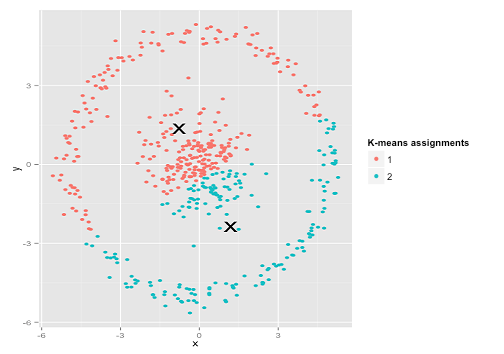

다만 위 이미지에서 짐작할 수 있듯, KMeans의 단점은 데이터의 형태가 저런 식으로 분포해 있다면 제대로 된 군집화를 잘 수행하지 못한다는 데에서 찾을 수 있다. 이러한 문제점을 해결하기 위해 밀도기반 분석법인 DBSCAN 등 다른 메소드가 있으나 일단은 생략하자. 

# 머신러닝을 마무리하며

4주동안 데이터 처리 기법 외에도 정말 수많은 알고리즘을 배웠다. LinearRegression, SVM, LightGBM, XGBoost 등 지도학습 알고리즘 외에도 PCA, K-means 등의 비지도학습 알고리즘도 말이다.




각 알고리즘은 어떤 상황에서 사용하고 어떠한 특징이 있으며 하이퍼파라미터는 무엇이 있는지 등도 공부했다. 하지만 중요한 것은 무엇일까?

개발자나 수학자에게 중요한 것은 알고리즘 하나하나의 작동원리였겠다. (알고리즘을 개선하기 위한 하이퍼파라미터는 무엇이 필요하고 실험에 의해 어떠한 데이터 형태일 때 어떠한 모델이 적합한지...)


다만 데이터 과학자는 그런 알고리즘 하나하나가 아닌 Task에 집중할 수 있어야 한다. 어떠한 임무를 수행하고 싶고, 그 임무를 수행하기 위해서 데이터는 어떤 것을 어떻게 수집해야 하고, 그 임무를 수행하기 위해 논리적인 기계학습을 수행하였는지가 가장 중요하다.

https://www.data.go.kr/tcs/eds/bcm/selectBigdataContestDataListView.do

위 이야기들의 근거로 pycaret을 보면서 4주차를 마무리해보자. pycaret은 결측치 제거, 결측치 대체, 컬럼 삭제, 모델 선택, 하이퍼파라미터튜닝, cross validation, train_test_split, 학습, 앙상블 등 기계학습을 위한 거의 모든 과정을 **자동화**할 수 있는 모델이다. 이러한 자동화 머신러닝을 AutoML이라 부른다. 뭐 GridSearchCV도 일종의 자동화지만 pycaret 같은 것과는 급이 다르다..

In [6]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 83.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 109.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 KB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [2]:
from pycaret.utils import enable_colab

enable_colab()

Colab mode enabled.


In [22]:
!pip uninstall sklearn -y
!pip install --upgrade sklearn
!pip install scikit-learn==0.23.2 --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from pycaret.classification import compare_models, setup, blend_models, finalize_model

In [7]:
titanic.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    int64  
 8   Family_Size  891 non-null    int64  
 9   Alone        891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


In [9]:
category = ["Pclass", "Sex", "SibSp", "Parch", "Family_Size", "Alone"] #카테고리 변수 컬럼 
dismiss = ["Embarked"] #버릴 컬럼
numerical = ["Fare", "Age"] #수치형 변수 컬럼 

In [10]:
#pipeline setup
#여기서 실행이 안되면 런타임 다시 시작 및 전부 재실행을 할 것.
clf = setup(data=titanic, 
            target='Survived', 
            ignore_features = dismiss,           # 분석/학습에 고려하지 않을 feature(컬럼) 제거
            categorical_features = category, # 범주형 컬럼 지정
            numeric_features = numerical,         # 수치형 컬럼 지정
            normalize = True,                            # 정규화 적용
            normalize_method='zscore',                 # 정규화 방식 지정
            imputation_type='iterative',               # 결측치를 lightgbm으로 예측하여 채움
            iterative_imputation_iters=10,             # imputation iteration 지정
            categorical_iterative_imputer='lightgbm',
            polynomial_features=True,
            silent=True,
            ) 

,Description,Value
0,session_id,8419
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 10)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Pclass', 'Sex',
                                                            'SibSp', 'Parch',
                                                            'Family_Size',
                                                            'Alone'],
                                      display_types=False,
                                      features_todrop=['Embarked'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['Fare', 'Age'],
                                      target='Survived', time_features=[])),
                ('imputer',
                 Iterative_Imputer(add_indicator=False,
                                   clas...
             

In [11]:
best_models = compare_models(sort='f1', n_select=5, fold=5) 
#f1 score를 기준으로 정렬하겠다는 의미
# n_select는 몇 개의 모델을 활용할 것인지
#fold는 Kfold에서 K 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8074,0.8432,0.7112,0.7689,0.7380,0.5862,0.5881,0.104
lightgbm,Light Gradient Boosting Machine,0.8074,0.8456,0.6945,0.7842,0.7347,0.5845,0.5889,0.382
gbc,Gradient Boosting Classifier,0.8106,0.8458,0.6819,0.7966,0.7343,0.5885,0.5933,0.224
lr,Logistic Regression,0.8106,0.8462,0.6816,0.7994,0.7335,0.5882,0.5944,0.594
ridge,Ridge Classifier,0.8025,0.0000,0.6692,0.7852,0.7221,0.5705,0.5753,0.018
lda,Linear Discriminant Analysis,0.8009,0.8383,0.6651,0.7842,0.7192,0.5666,0.5717,0.038
rf,Random Forest Classifier,0.7801,0.8371,0.6988,0.7226,0.7079,0.5321,0.5346,0.306
et,Extra Trees Classifier,0.7785,0.8123,0.6946,0.7204,0.7049,0.5282,0.5305,0.436
knn,K Neighbors Classifier,0.7866,0.8189,0.6441,0.7634,0.6970,0.5344,0.5403,0.022
dt,Decision Tree Classifier,0.7560,0.7375,0.6734,0.6916,0.6792,0.4829,0.4860,0.020


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:[AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=8419), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=8419, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impuri

In [13]:
blended_models = blend_models(best_models, fold=5) #위에서 뽑은 5개의 모델로 앙상블.

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8160,0.0,0.6875,0.8049,0.7416,0.6001,0.6046
1,0.8400,0.0,0.7292,0.8333,0.7778,0.6536,0.6572
2,0.8160,0.0,0.7083,0.7907,0.7473,0.6033,0.6055
3,0.8226,0.0,0.6383,0.8571,0.7317,0.6034,0.6180
4,0.8145,0.0,0.7083,0.7907,0.7473,0.6015,0.6037
Mean,0.8218,0.0,0.6943,0.8153,0.7491,0.6124,0.6178
Std,0.0095,0.0,0.0310,0.0261,0.0154,0.0207,0.0204


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:VotingClassifier(estimators=[('ada',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=50,
                                                 random_state=8419)),
                             ('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_

In [14]:
finalized_models = finalize_model(blended_models)
#만들어진 최종 앙상블 모델인 blended_models로 재학습.

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=VotingClassifier(estimators=[('ada',
                              AdaBoostClassifier(algorithm='SAMME.R',
                                                 base_estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=50,
                                                 random_state=8419)),
                             ('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                    

위에서 공부했던 각종 하이퍼파라미터, 기법들.. 이미 전부 자동화가 되어버렸다 ㅜㅜ 우리가 집중해야 할 것은 알고리즘 그 자체가 아닌 것. 

제일 중요한 것은 깨끗한 데이터 수집, 더러운 데이터 청소, 전처리, 논리적인 해석, 가치 제안

마지막 주차인 5주차에는 데이터 수집 및 더러운 데이터(반정형, 비정형 데이터)처리 에 대해 공부한다. https://www.koreaexim.go.kr/ir/HPHKIR020M01?apino=2&viewtype=R#tab1 에서 오픈 api 신청을 해 놓는 것이 필수이다.

#4주차 과제

0. 전체 코드만(텍스트 제외) 필사하라.

1. https://www.notion.so/deepdaiv/4efbe5caadfc44758b978a594fcdf486?pvs=4#aa4f126b43f242f6866aa2d4c3eb0090에서 CC General 데이터셋을 다운받고 데이터프레임 형식으로 만들어라.

In [ ]:
#이 데이터셋은 소비자층 분류를 통해 마케팅 전략을 짜기 위한 정보를 담고 있다. 
#약 9000명 정도의 소비자들의 정보가 담겨 있으며, 자세한 컬럼 설명은 아래에 있다.
"""
CUSTID: Identification of Credit Cardholder (Categorical)
BALANCE: Balance amount left in their account to make purchases
BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
PURCHASES: Amount of purchases made from the account
ONEOFFPURCHASES: Maximum purchase amount did in one-go
INSTALLMENTSPURCHASES: Amount of purchase done in installment
CASH ADVANCE: Cash in advance given by the user
PURCHASESFREQUENCY: How frequently the Purchases are being made score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one go (1 = frequently purchased, 0 = not frequently purchased)
PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
CASHADVANCEFREQUENCY: How frequently is the cash in advance being paid
CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"
PURCHASESTRX: Number of purchase transactions made
CREDIT LIMIT: Limit of Credit Card for user
PAYMENTS: Amount of Payment done by the user
MINIMUM_PAYMENTS: Minimum amount of payments made by the user
PRCFULLPAYMENT: Percent of full payment paid by the user
TENURE: Tenure of credit card service for user
"""

2. info와 describe 등으로 데이터의 형태를 파악하라. 또한 데이터의 결측치를 확인하고 대체한 뒤 대체 방식의 근거를 제시하라.

3. 상관관계를 히트맵으로 그리고 높은 상관관계를 보이는 변수들을 찾아라.

4. 3가지의 각기 다른 인사이트를 담은 시각화를 수행하라.

5. PCA를 활용해 차원 축소를 해 보아라. 단, n_components가 5인 경우, 10인 경우, 15인 경우를 비교하고 분산비의 차원에서 몇 개의 components를 사용하는 것이 가장 합리적인지 제안하고 그 근거를 제시하라.

6. 5번의 결과로 PCA된 데이터에 Kmeans Clustering을 해보고 Silhouette score를 활용해 최적의 K를 정하라.